In [1]:
!pip install git+https://github.com/Bots-Avatar/inseq2 -q
!pip install git+https://github.com/Bots-Avatar/ExplainitAll -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━

In [3]:
import gensim
from inseq import load_model

from explainitall.gpt_like_interp import viz
from explainitall.gpt_like_interp import dl
from explainitall.gpt_like_interp import interp

In [4]:
def load_nlp_model(nlp_model_url):
    nlp_model_path = dl.DownloadManager.load_zip(nlp_model_url)
    return gensim.models.KeyedVectors.load_word2vec_format(nlp_model_path, binary=True)

# 'ID': 180
# 'Размер вектора': 300
# 'Корпус': 'Russian National Corpus'
# 'Размер словаря': 189193
# 'Алгоритм': 'Gensim Continuous Bag-of-Words'
# 'Лемматизация': True

nlp_model = load_nlp_model ('http://vectors.nlpl.eu/repository/20/180.zip')

Downloading: /root/.cache/180_zip: 100%|██████████| 462M/462M [00:08<00:00, 59.6MiB/s]
Extracting: /root/.cache/180_zip_data: 100%|██████████| 4/4 [00:08<00:00,  2.23s/it]


In [5]:
def load_gpt_model(gpt_model_name):
    return load_model(model=gpt_model_name,
                           attribution_method="integrated_gradients")

# 'Фреймворк': 'transformers'
# 'Тренировочные токены': '80 млрд'
# 'Размер контекста': 2048

gpt_model = load_gpt_model("sberbank-ai/rugpt3small_based_on_gpt2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/551M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

In [24]:
clusters_discr = [
    {'name': 'Животные', 'centroid': ['собака', 'кошка', 'заяц'], 'top_k': 140},
    {'name': 'Лекарства', 'centroid': ['уколы', 'таблетки', 'противовирусное'], 'top_k': 160},
    {'name': 'Болезни', 'centroid': ['простуда', 'орви', 'орз', 'грипп'], 'top_k': 20},
    {'name': 'Симптомы', 'centroid': ['температура', 'насморк'], 'top_k': 20}
]

explainer = interp.ExplainerGPT2(gpt_model=gpt_model, nlp_model=nlp_model)


expl_data = explainer.interpret(
    input_texts='я думаю что у моей кошки простуда, у нее температура, постоянный кашель: чем мне лечить мою кошку? ответ:',
    generated_texts='На сегодняшний день существует специальное противовирусное лечение для кошек, так же можно применять антибиотики',
    clusters_description=clusters_discr,
    batch_size=100,
    steps=14,
)



Attributing with integrated_gradients...:  56%|█████▌    | 24/43 [00:00<?, ?it/s]

Attributing with integrated_gradients...:  58%|█████▊    | 25/43 [00:03<01:00,  3.37s/it]

Attributing with integrated_gradients...:  60%|██████    | 26/43 [00:07<01:07,  3.95s/it]

Attributing with integrated_gradients...:  63%|██████▎   | 27/43 [00:11<01:00,  3.81s/it]

Attributing with integrated_gradients...:  65%|██████▌   | 28/43 [00:15<00:56,  3.77s/it]

Attributing with integrated_gradients...:  67%|██████▋   | 29/43 [00:19<00:57,  4.13s/it]

Attributing with integrated_gradients...:  70%|██████▉   | 30/43 [00:23<00:52,  4.07s/it]

Attributing with integrated_gradients...:  72%|███████▏  | 31/43 [00:27<00:48,  4.08s/it]

Attributing with integrated_gradients...:  74%|███████▍  | 32/43 [00:33<00:48,  4.42s/it]

Attributing with integrated_gradients...:  77%|███████▋  | 33/43 [00:37<00:43,  4.39s/it]

Attributing with integrated_gradients...:  79%|███████▉  | 34/43 [00:41<00:39,  4.41s/it]

Attri

In [ ]:
# ==============слова==============

In [25]:
# Карта важности слов
expl_data.word_imp_df

,Tokens,На,сегодняшний,день,существует,специальное,противовирусное,лечение,для,кошек,,так,же,можно,применять,антибиотики
0,я,0.040555,0.056404,0.043776,0.035426,0.033671,0.046261,0.026546,0.027503,0.030530,0.025709,0.032060,0.030966,0.032397,0.031446,0.026451
1,думаю,0.028215,0.035409,0.024274,0.025443,0.020535,0.023112,0.013747,0.013515,0.019542,0.018513,0.028633,0.031981,0.031477,0.016247,0.014616
2,что,0.020971,0.020856,0.020364,0.015501,0.015042,0.021849,0.013292,0.010450,0.018545,0.014000,0.018326,0.030758,0.023283,0.012470,0.022168
3,у,0.016417,0.018083,0.014662,0.011473,0.010523,0.021000,0.008607,0.008195,0.015986,0.011157,0.010420,0.009571,0.011356,0.008225,0.013459
4,моей,0.025859,0.032813,0.023844,0.023659,0.018824,0.028457,0.012557,0.014643,0.025287,0.012721,0.015889,0.015285,0.018388,0.011960,0.013622
5,кошки,0.026186,0.045362,0.023670,0.026911,0.023132,0.079771,0.020313,0.028612,0.092125,0.020123,0.021062,0.017138,0.018490,0.024620,0.028242
6,простуда,0.028066,0.028443,0.024124,0.017523,0.017404,0.078104,0.013685,0.018939,0.020337,0.017521,0.014864,0.016514,0.017167,0.020109,0.022618
7,,0.019019,0.015317,0.019044,0.013244,0.017981,0.024358,0.012912,0.012768,0.011588,0.026388,0.011134,0.030270,0.017015,0.013204,0.025445
8,у,0.021077,0.018937,0.015087,0.012104,0.012505,0.010644,0.008756,0.008287,0.007910,0.017830,0.011632,0.022861,0.012323,0.009358,0.017899
9,нее,0.023424,0.026871,0.023033,0.019682,0.015655,0.014607,0.010801,0.012153,0.009644,0.012432,0.013190,0.017876,0.017315,0.013007,0.013943


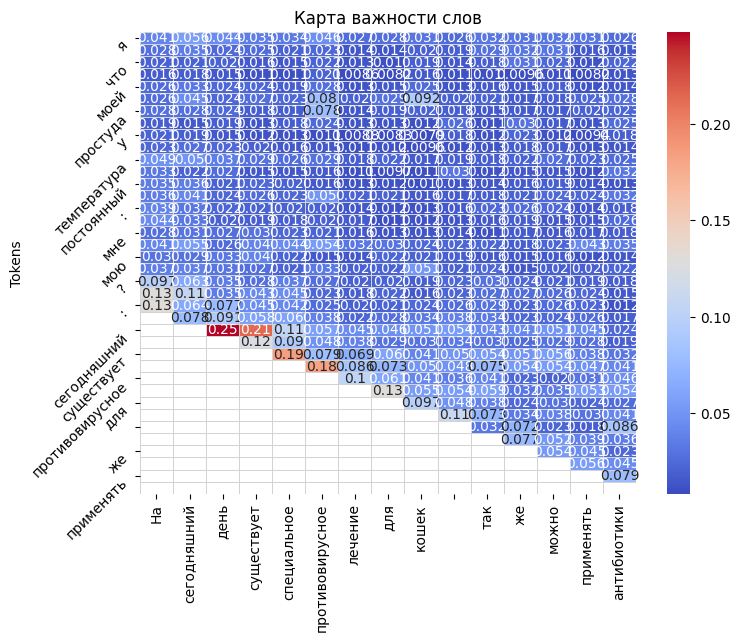

In [26]:
# Тепловая карта важности слов
expl_data.show_word_imp_heatmap()

In [27]:
# Карта важности слов, нормированная
expl_data.word_imp_norm_df


,Tokens,На,сегодняшний,день,существует,специальное,противовирусное,лечение,для,кошек,,так,же,можно,применять,антибиотики
0,я,0.797615,0.902211,0.821327,0.756600,0.739017,0.839265,0.602465,0.629680,0.695628,0.576036,0.719215,0.702905,0.723726,0.710386,0.599604
1,думаю,0.647841,0.756446,0.525288,0.567138,0.370208,0.479798,0.117359,0.111366,0.327087,0.283362,0.657705,0.718128,0.710859,0.195091,0.141690
2,что,0.389151,0.384158,0.362736,0.169466,0.154688,0.427070,0.105797,0.051323,0.284694,0.124150,0.275614,0.699492,0.486732,0.087000,0.440639
3,у,0.201182,0.265639,0.143058,0.067597,0.052378,0.390419,0.030081,0.026531,0.185889,0.062185,0.050894,0.040007,0.065542,0.026781,0.109959
4,моей,0.580963,0.729019,0.508882,0.501656,0.296426,0.653629,0.088861,0.142485,0.561816,0.092452,0.182532,0.162399,0.278187,0.076608,0.114102
5,кошки,0.591415,0.832823,0.502066,0.613225,0.480630,0.956047,0.360505,0.657226,0.963058,0.352270,0.393130,0.228119,0.282418,0.538126,0.648489
6,простуда,0.644189,0.653295,0.519615,0.243150,0.238464,0.954764,0.115733,0.301298,0.361579,0.243058,0.149152,0.204734,0.229252,0.351663,0.459515
7,,0.304677,0.163435,0.305743,0.104626,0.261461,0.528442,0.096775,0.093514,0.069650,0.597663,0.061806,0.691038,0.223417,0.103658,0.567196
8,у,0.393749,0.301204,0.156082,0.079442,0.087741,0.054140,0.031455,0.027293,0.024300,0.255384,0.070441,0.469544,0.083898,0.037602,0.258163
9,нее,0.492371,0.612073,0.476604,0.333111,0.174597,0.141421,0.056512,0.080414,0.040869,0.086185,0.103324,0.257231,0.234963,0.098995,0.122597


Attributing with integrated_gradients...:  83%|████████▎ | 34/41 [08:22<05:51, 50.26s/it]


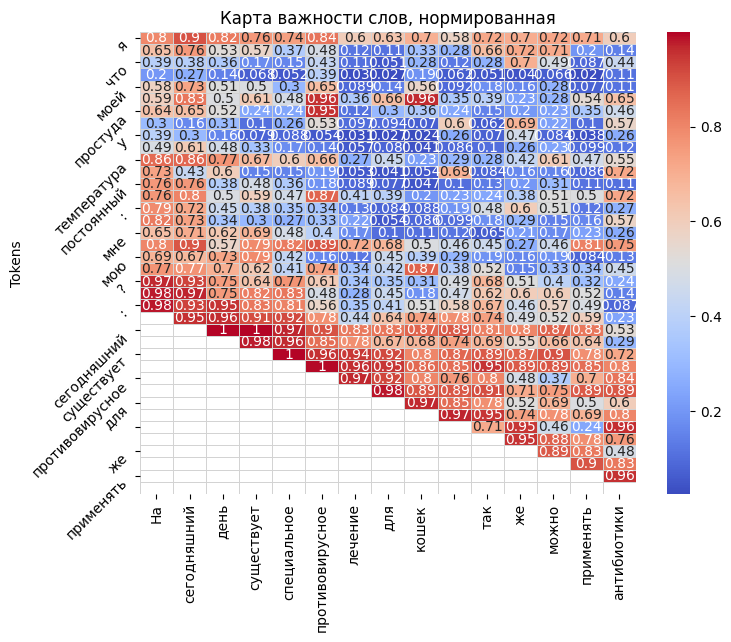

In [28]:
# Тепловая карта важности слов, нормированная
expl_data.show_word_imp_norm_heatmap()

In [ ]:
# ==============кластеры==============

In [29]:
# Карта важности кластеров
expl_data.cluster_imp_df

,Tokens,unnamed,unnamed,unnamed,unnamed,unnamed,unnamed,unnamed,unnamed,Животные,unnamed,unnamed,unnamed,unnamed,unnamed,Лекарства
0,unnamed,0.797615,0.902211,0.821327,0.756600,0.739017,0.839265,0.602465,0.629680,0.695628,0.576036,0.719215,0.702905,0.723726,0.710386,0.599604
1,unnamed,0.647841,0.756446,0.525288,0.567138,0.370208,0.479798,0.117359,0.111366,0.327087,0.283362,0.657705,0.718128,0.710859,0.195091,0.141690
2,unnamed,0.389151,0.384158,0.362736,0.169466,0.154688,0.427070,0.105797,0.051323,0.284694,0.124150,0.275614,0.699492,0.486732,0.087000,0.440639
3,unnamed,0.201182,0.265639,0.143058,0.067597,0.052378,0.390419,0.030081,0.026531,0.185889,0.062185,0.050894,0.040007,0.065542,0.026781,0.109959
4,unnamed,0.580963,0.729019,0.508882,0.501656,0.296426,0.653629,0.088861,0.142485,0.561816,0.092452,0.182532,0.162399,0.278187,0.076608,0.114102
5,Животные,0.591415,0.832823,0.502066,0.613225,0.480630,0.956047,0.360505,0.657226,0.963058,0.352270,0.393130,0.228119,0.282418,0.538126,0.648489
6,Болезни,0.644189,0.653295,0.519615,0.243150,0.238464,0.954764,0.115733,0.301298,0.361579,0.243058,0.149152,0.204734,0.229252,0.351663,0.459515
7,unnamed,0.304677,0.163435,0.305743,0.104626,0.261461,0.528442,0.096775,0.093514,0.069650,0.597663,0.061806,0.691038,0.223417,0.103658,0.567196
8,unnamed,0.393749,0.301204,0.156082,0.079442,0.087741,0.054140,0.031455,0.027293,0.024300,0.255384,0.070441,0.469544,0.083898,0.037602,0.258163
9,unnamed,0.492371,0.612073,0.476604,0.333111,0.174597,0.141421,0.056512,0.080414,0.040869,0.086185,0.103324,0.257231,0.234963,0.098995,0.122597


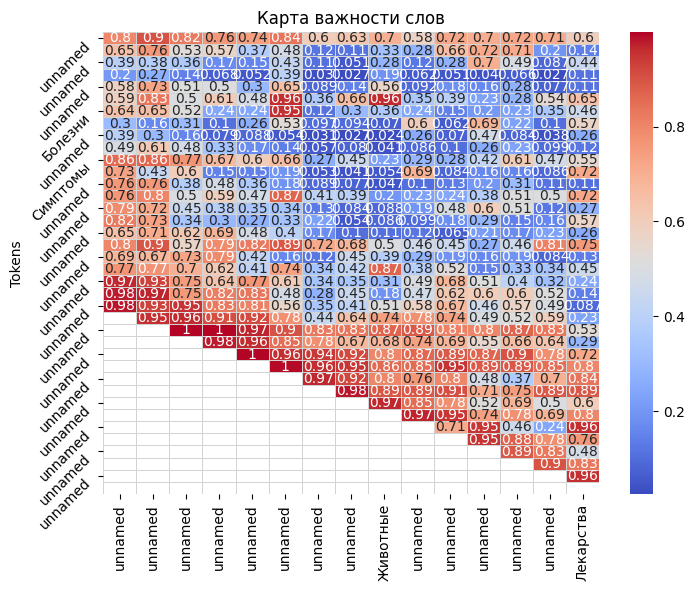

In [30]:
# Тепловая карта важности кластеров
expl_data.show_cluster_imp_heatmap()

In [31]:
# Карта важности кластеров, группированная
print(expl_data.cluster_imp_aggr_df)

      Tokens  Животные  Лекарства
0    Болезни  0.361579   0.459515
1   Животные  1.837039   1.899762
2  Лекарства  0.000000   0.000000
3   Симптомы  0.226121   0.545646


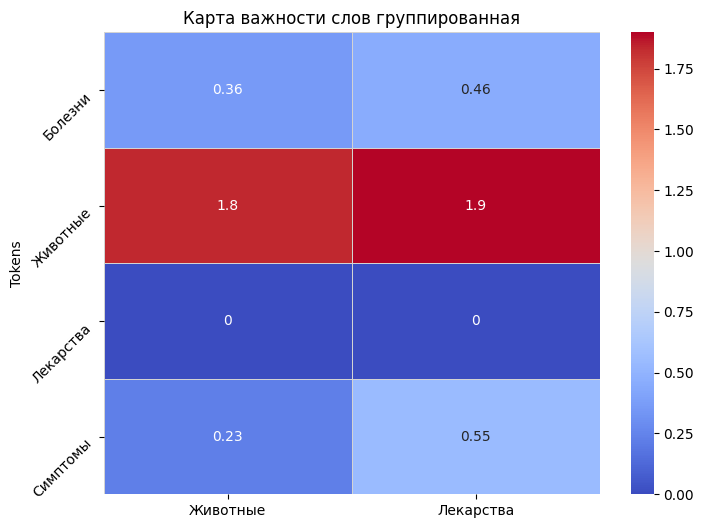

In [32]:
# Тепловая карта важности кластеров, группированная
expl_data.show_cluster_imp_aggr_heatmap()